## Project to Analyze Movie data using Python

### Skills used - Pandas, Numpy, Seaborn, Matplotlib

### Sections
 1. Import Packages 
 2. Read Data and Explore
 3. Visualize the Data

### Import Packages

In [127]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.axes as ax

### Read Data and Explore

In [2]:
# Read data from dataset
df = pd.read_csv('movies.csv')
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


Explore the data to see if there are any null values in any of the columns.

In [12]:
# check for nulls in any columns
for col_name in df.columns:
    missing_pct = np.mean(df[col_name].isnull())*100
    if missing_pct > 0:
        print('{} - {} %'.format(col_name, round(missing_pct,2)))

rating - 1.0 %
released - 0.03 %
score - 0.04 %
votes - 0.04 %
writer - 0.04 %
star - 0.01 %
country - 0.04 %
budget - 28.31 %
gross - 2.46 %
company - 0.22 %
runtime - 0.05 %


There are a lot of nulls in budget column, almost 28%. 2171 nulls in 7668. Since we are using the budget as one of the main columns, we will have to move forward by deleting the rows with budget as null.

In [16]:
np.sum(df['budget'].isnull())

2171

In [43]:
df.shape[0]

7668

In [41]:
df_budget_nulls_removed = df.dropna()

In [42]:
df_budget_nulls_removed.shape

(5421, 15)

In [44]:
# check the datatype of all the columns
df_budget_nulls_removed.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [45]:
# check if there are any duplicates and drop them
final_df = df_budget_nulls_removed.drop_duplicates()

In [49]:
# change datatype of budget and price
final_df['budget'] = final_df['budget'].astype('int64')
final_df['gross'] = final_df['gross'].astype('int64')
final_df['votes'] = final_df['votes'].astype('int64')

In [50]:
# looks like there are no duplicates
final_df.shape

(5421, 15)

In [51]:
# sort dataframe based on the column we are interested in
final_df.sort_values(by='gross',ascending=False, inplace=True)
final_df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0


### Visualize the Data

Text(0.5, 1.0, 'Relationship between Budget vs Gross')

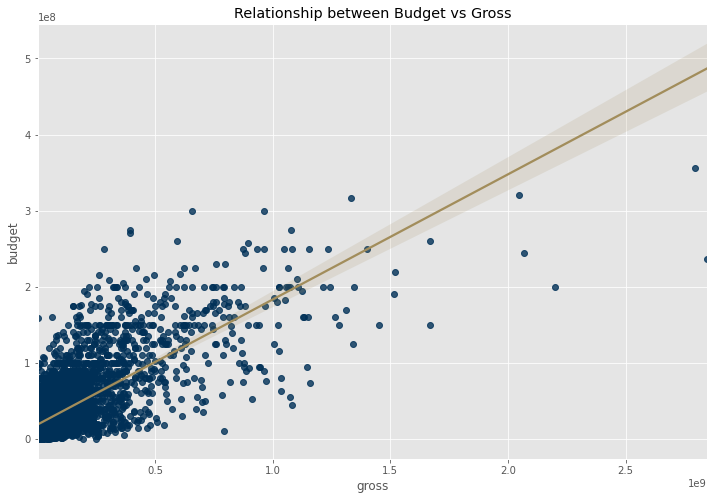

In [115]:
# regression plot on the budget and gross
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8)
sns.regplot(x='gross', y= 'budget', data=final_df, scatter_kws={'color':'#003057'}, line_kws={'color':'#A28D5B'})
plt.title("Relationship between Budget vs Gross")

Text(0.5, 1.0, 'Relationship between Budget vs Score')

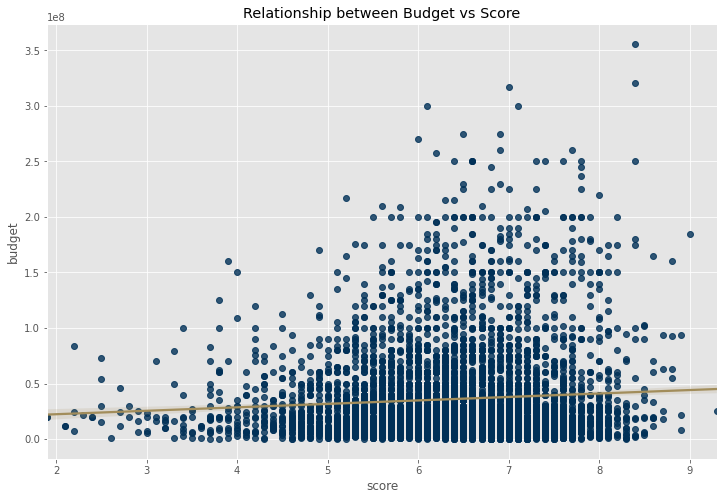

In [114]:
sns.regplot(x='score', y= 'budget', data=final_df, scatter_kws={'color':'#003057'}, line_kws={'color':'#A28D5B'})
plt.title("Relationship between Budget vs Score")

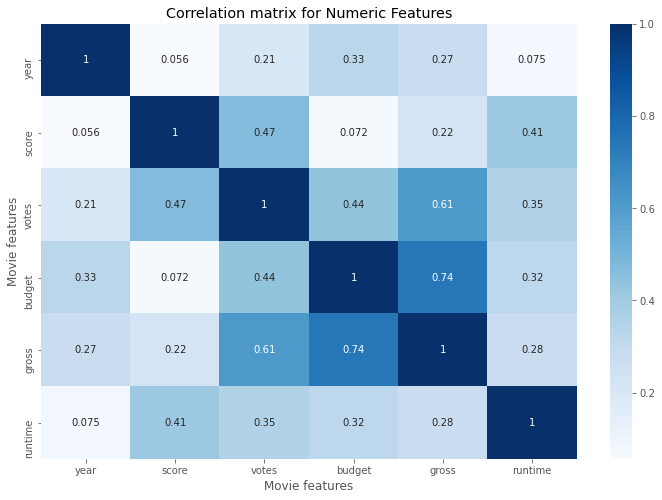

In [70]:
correlation_matrix = final_df.corr()
sns.heatmap(correlation_matrix, annot = True,cmap='Blues')

plt.title("Correlation matrix for Numeric Features")
plt.xlabel("Movie features")
plt.ylabel("Movie features")

plt.show()

In [93]:
grouped_gross_df = final_df.groupby(['company'])[["gross"]].sum()
grouped_gross_df = grouped_gross_df.sort_values(by='gross',ascending=False).reset_index()

Text(0.5, 1.0, 'Top 10 Grossing Companies')

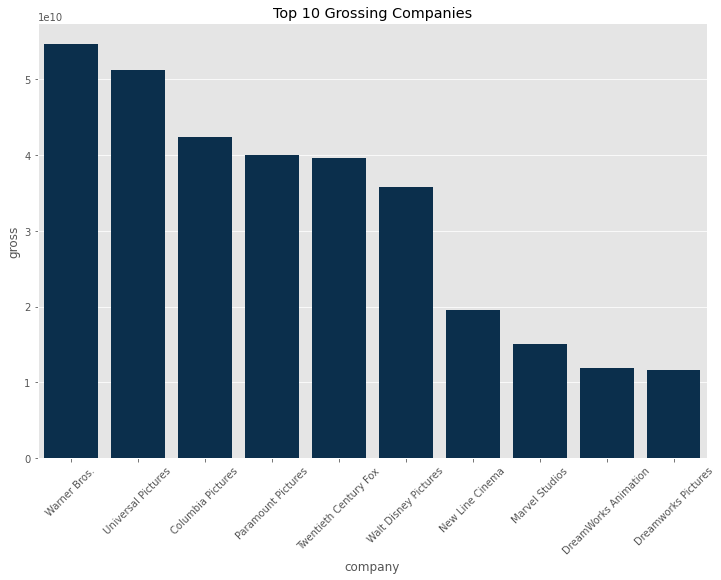

In [116]:
plt.xticks(rotation=45)
sns.barplot(x='company',y='gross',data=grouped_gross_df.iloc[:10,:],color='#003057')
plt.title("Top 10 Grossing Companies")

Text(0.5, 1.0, 'Stripplot of Movie ratings vs Gross Collection')

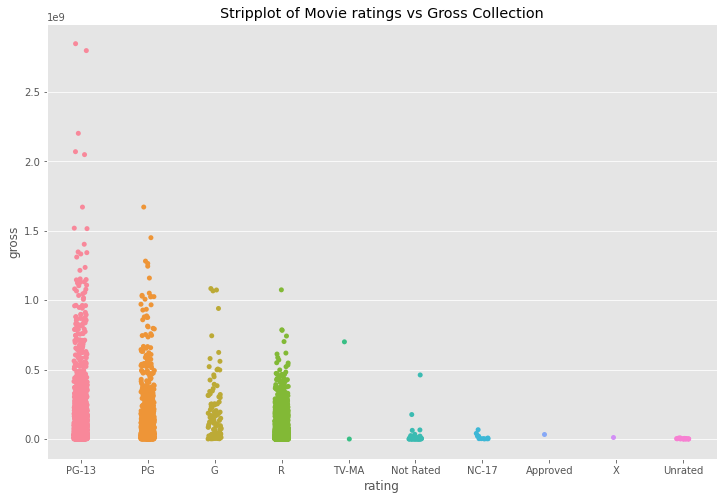

In [123]:
sns.stripplot(x="rating", y="gross", data=final_df)
plt.title('Stripplot of Movie ratings vs Gross Collection')